# Tutorial on the ExcludeMaskRegion objects

In this tutorial, we go over some details on the usage of the ExcludeMaskRegion objects that can be used to clean mask from specified spectral regions. 

## Import the necessary packages

In [1]:
import specpolFlow as pol
import pandas as pd
import matplotlib.pyplot as plt

## The structure of a ExcludeMaskRegion object

TODO: Explain the structure of the object, and the structure of the corresponding file

## How to create your own 

TODO

## How to use the Default functions

TODO

In [2]:
reg1 = pol.get_Balmer_regions_default(velrange=100)
pd.DataFrame(reg1.to_dict())

,start,stop,type
0,656.062088,656.499912,Halpha
1,485.977841,486.302159,Hbeta
2,433.905217,434.194783,Hgamma
3,410.033182,410.306818,Hdelta
4,396.877572,397.142428,Hepsilon
5,360.000000,392.000000,Hjump


In [3]:
reg2 = pol.get_telluric_regions_default()

pd.DataFrame(reg2.to_dict())

,start,stop,type
0,587.5,592.0,telluric
1,627.5,632.5,telluric
2,686.0,705.3,telluric
3,717.0,735.0,telluric
4,759.0,771.0,telluric
5,790.0,795.0,telluric
6,809.0,990.0,telluric


## How to combine multiple ExcludeMaskRegions

TODO

In [4]:
concat = reg1+reg2

pd.DataFrame(concat.to_dict())

,start,stop,type
0,656.062088,656.499912,Halpha
1,485.977841,486.302159,Hbeta
2,433.905217,434.194783,Hgamma
3,410.033182,410.306818,Hdelta
4,396.877572,397.142428,Hepsilon
5,360.000000,392.000000,Hjump
6,587.500000,592.000000,telluric
7,627.500000,632.500000,telluric
8,686.000000,705.300000,telluric
9,717.000000,735.000000,telluric


## How to save to file and read from file

TODO

In [5]:
concat.save('ExcludeMaskRegions_tutorialfiles/ExcludeMaskRegions.dat')

FileNotFoundError: [Errno 2] No such file or directory: 'ExcludeMaskRegions_tutorialfiles/ExcludeMaskRegions.dat'

In [ ]:
reg = pol.read_exclude_mask_regions('ExcludeMaskRegions_tutorialfiles/ExcludeMaskRegions.dat')
pd.DataFrame(reg.to_dict())

,start,stop,type
0,656.062088,656.499912,Halpha
1,485.977841,486.302159,Hbeta
2,433.905217,434.194783,Hgamma
3,410.033182,410.306818,Hdelta
4,396.877572,397.142428,Hepsilon
5,360.000000,392.000000,Hjump
6,587.500000,592.000000,telluric
7,627.500000,632.500000,telluric
8,684.000000,705.300000,telluric
9,717.000000,735.000000,telluric


## How to use this ExcludeMaskRegions object to clean a mask

TODO: write some text here

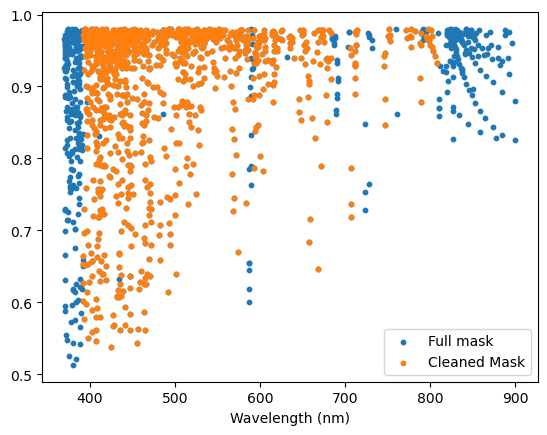

In [ ]:
mask = pol.read_mask('ExcludeMaskRegions_tutorialfiles/T27000G35_depth0.02.mask')

fig, ax = plt.subplots(1,1)
ax.scatter(mask.wl, 1-mask.depth, s=10, label='Full mask')
ax.set_xlabel('Wavelength (nm)')

mask_clean = mask.clean(reg).prune()
ax.scatter(mask_clean.wl, 1-mask_clean.depth, s=10, label='Cleaned Mask')

ax.legend(loc=0)

In [ ]:
print(mask_clean.iuse)

[1 1 1 ... 1 1 1]
